In [1]:
import sys
from pathlib import Path
sys.path.append('..')

import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path  = Path('../data/20240812.gkg.csv')
# pl.DataFrame()
with open(file_path, 'rb') as f:
    file_bytes = f.read()
    pl_df = pl.read_csv(file_bytes, separator='\t')

In [4]:
pl_df.head()

DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
i64,i64,str,str,str,str,str,str,str,str,str
20240812,1,null,"""TAX_DISEASE;TAX_DISEASE_PREGNA…","""2#California, United States#US…","""john seago;dara kass;kate arno…","""centers for medicare;u s healt…","""-8.82562277580071,1.5658362989…","""1192233066,1192233067,11922322…","""localnews8.com""","""https://localnews8.com/news/20…"
20240812,1,"""ARREST#30##4#Belfast, Belfast,…","""TRIAL;SOC_GENERALCRIME;DISCRIM…","""4#Belfast, Belfast, United Kin…","""jason galbraith;glen kane;core…","""public prosecution service;pol…","""-8.83333333333333,0.6666666666…","""1192299611,1192264027,11922640…","""thisiswiltshire.co.uk""","""https://www.thisiswiltshire.co…"
20240812,1,null,"""WB_336_NON_BANK_FINANCIAL_INST…","""1#United States#US#US#39.82817…",null,"""cohen steers capital managemen…","""1.14942528735632,1.14942528735…",null,"""dailypolitical.com""","""https://www.dailypolitical.com…"
20240812,1,null,"""TAX_ETHNICITY;TAX_ETHNICITY_FR…","""2#California, United States#US…","""los angeles;simone biles;karen…",null,"""1.91082802547771,2.54777070063…",null,"""iheart.com""","""https://mix1065.iheart.com/fea…"
20240812,1,null,"""EDUCATION;TAX_FNCACT;TAX_FNCAC…","""4#Brisbane, Queensland, Austra…","""belinda merrin;stephen patrick…","""queensland college of teachers…","""-7.34177215189874,0.7594936708…","""1192156812,1192156925,11921569…","""theguardian.com""","""https://www.theguardian.com/au…"


In [21]:
pl_df.describe()

statistic,DATE,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
str,f64,f64,str,str,str,str,str,str,str,str,str
"""count""",94152.0,94152.0,"""14423""","""81420""","""94152""","""78819""","""77554""","""94152""","""42496""","""94152""","""94152"""
"""null_count""",0.0,0.0,"""79729""","""12732""","""0""","""15333""","""16598""","""0""","""51656""","""0""","""0"""
"""mean""",2.0240812e7,1.11918,null,null,null,null,null,null,null,null,null
"""std""",0.0,1.879114,null,null,null,null,null,null,null,null,null
"""min""",2.0240812e7,1.0,"""AFFECT#052##1#Greece#GR#GR#39#…","""ACT_FORCEPOSTURE;ARMEDCONFLICT…","""0#Georgia, , Georgia#GG#GG#42#…","""a carlos e gomez;ryan north""","""a b c securities commission""","""-0.0339328130302001,2.03596878…","""1120554713,1120554713,11923114…","""1009theeagle.com""","""http://africa.chinadaily.com.c…"
"""25%""",2.0240812e7,1.0,null,null,null,null,null,null,null,null,null
"""50%""",2.0240812e7,1.0,null,null,null,null,null,null,null,null,null
"""75%""",2.0240812e7,1.0,null,null,null,null,null,null,null,null,null
"""max""",2.0240812e7,294.0,"""WOUND#97##3#Hunterbrook, New Y…","""WOUND;UNGP_FORESTS_RIVERS_OCEA…","""5#Zhejiang, Zhejiang, China#CH…","""zyon braun;bijan djir-sarai""","""zurich premier wealth center;i…","""9.98531571218796,10.5726872246…","""1192318921""","""zrock103.com""","""https://zoutpansberger.co.za/a…"


In [8]:
# se filtran solo los datos de tone y la url
pl_df.filter(
    pl.any_horizontal(pl.col('TONE').is_not_null()),
    pl.col('TONE').str.contains(',')
).with_columns(pl.col('TONE').str.split(',')).filter(
    pl.col('TONE').list.len().eq(6)
).with_columns(
    pl.col("TONE").list.get(0).alias('tone'),
    pl.col("TONE").list.get(1).alias('positive_score'),
    pl.col("TONE").list.get(2).alias('negative_score'),
    pl.col("TONE").list.get(3).alias('polarity')
).select(
    pl.col(['SOURCEURLS', 'tone', 'positive_score', 'negative_score', 'polarity'])
)

SOURCEURLS,tone,positive_score,negative_score,polarity
str,str,str,str,str
"""https://localnews8.com/news/20…","""-8.82562277580071""","""1.56583629893238""","""10.3914590747331""","""11.9572953736655"""
"""https://www.thisiswiltshire.co…","""-8.83333333333333""","""0.666666666666667""","""9.5""","""10.1666666666667"""
"""https://www.dailypolitical.com…","""1.14942528735632""","""1.14942528735632""","""0""","""1.14942528735632"""
"""https://mix1065.iheart.com/fea…","""1.91082802547771""","""2.54777070063694""","""0.636942675159236""","""3.18471337579618"""
"""https://www.theguardian.com/au…","""-7.34177215189874""","""0.759493670886076""","""8.10126582278481""","""8.86075949367089"""
…,…,…,…,…
"""https://www.limerickleader.ie/…","""-2.46575342465753""","""2.19178082191781""","""4.65753424657534""","""6.84931506849315"""
"""https://www.themarketsdaily.co…","""1.52091254752852""","""1.71102661596958""","""0.190114068441065""","""1.90114068441065"""
"""https://www.theroar.com.au/202…","""-1.70765027322404""","""2.25409836065574""","""3.96174863387978""","""6.21584699453552"""


In [37]:
# se filtra por tema

pl_df.filter(
    pl.col('THEMES').str.contains("GENERAL_HEALTH")
).select(
    pl.col("DATE"),
    pl.col("THEMES"),
    pl.col("LOCATIONS"),
    pl.col("PERSONS"),
    pl.col("ORGANIZATIONS"),
)

DATE,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS
i64,str,str,str,str
20240812,"""TAX_DISEASE;TAX_DISEASE_PREGNA…","""2#California, United States#US…","""john seago;dara kass;kate arno…","""centers for medicare;u s healt…"
20240812,"""MANMADE_DISASTER_IMPLIED;TAX_F…","""1#United Kingdom#UK#UK#54#-4#U…","""jayson tatum;los angeles;snoop…","""boston celtics;olympics;team g…"
20240812,"""CRISISLEX_C07_SAFETY;MANMADE_D…","""3#Cheyenne, Wyoming, United St…","""lena bigelow;leo trenholm;los …","""sioux falls security national …"
20240812,"""SOC_POINTSOFINTEREST;SOC_POINT…","""1#Canada#CA#CA#60#-96#CA;4#Ott…","""duncan dee;john gradek;monette…","""westjet;gander international a…"
20240812,"""TAX_FNCACT;TAX_FNCACT_FATHER;K…","""3#Willard Bay State Park, Utah…",null,"""utah division of state parks"""
…,…,…,…,…
20240812,"""CRISISLEX_C03_WELLBEING_HEALTH…","""3#Coral Gables, Florida, Unite…","""susan nielson;caitlin donovan;…","""melbourne regional medical cen…"
20240812,"""GENERAL_HEALTH;MEDICAL;CRISISL…","""1#United Kingdom#UK#UK#54#-4#U…","""mike dunne;jim liptrot""","""united states;howorth air tech…"
20240812,"""KILL;CRISISLEX_T03_DEAD;CRISIS…","""4#Prince Albert, Saskatchewan,…",null,null


In [3]:
file_path  = Path('../data/parquets/general_health/GENERAL_HEALTH.parquet')
df = pl.read_parquet(file_path)
df

DATE,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,SOURCEURLS
i64,str,str,str,str,str
20240812,"""TAX_DISEASE;TAX_DISEASE_PREGNA…","""2#California, United States#US…","""john seago;dara kass;kate arno…","""centers for medicare;u s healt…","""https://localnews8.com/news/20…"
20240812,"""MANMADE_DISASTER_IMPLIED;TAX_F…","""1#United Kingdom#UK#UK#54#-4#U…","""jayson tatum;los angeles;snoop…","""boston celtics;olympics;team g…","""https://www.kisswtlz.com/syndi…"
20240812,"""CRISISLEX_C07_SAFETY;MANMADE_D…","""3#Cheyenne, Wyoming, United St…","""lena bigelow;leo trenholm;los …","""sioux falls security national …","""https://cowboystatedaily.com/2…"
20240812,"""SOC_POINTSOFINTEREST;SOC_POINT…","""1#Canada#CA#CA#60#-96#CA;4#Ott…","""duncan dee;john gradek;monette…","""westjet;gander international a…","""https://www.cowichanvalleyciti…"
20240812,"""TAX_FNCACT;TAX_FNCACT_FATHER;K…","""3#Willard Bay State Park, Utah…",null,"""utah division of state parks""","""https://www.fox5ny.com/news/fa…"
…,…,…,…,…,…
20240803,"""CRISISLEX_C04_LOGISTICS_TRANSP…","""3#Philadelphia, Pennsylvania, …","""tom hamilton;steven tyler;brad…","""instagram;wells fargo center""","""https://www.durangoherald.com/…"
20240803,"""USPEC_POLICY1;EPU_ECONOMY;EPU_…","""3#San Francisco, California, U…","""claudia sahm;anne dinnocenzio;…","""oceanfirst bank;associated pre…","""https://www.piquenewsmagazine.…"
20240803,"""TAX_FNCACT;TAX_FNCACT_STUDENTS…","""3#Charlotte, North Carolina, U…",null,null,"""https://www.wunc.org/2024-08-0…"


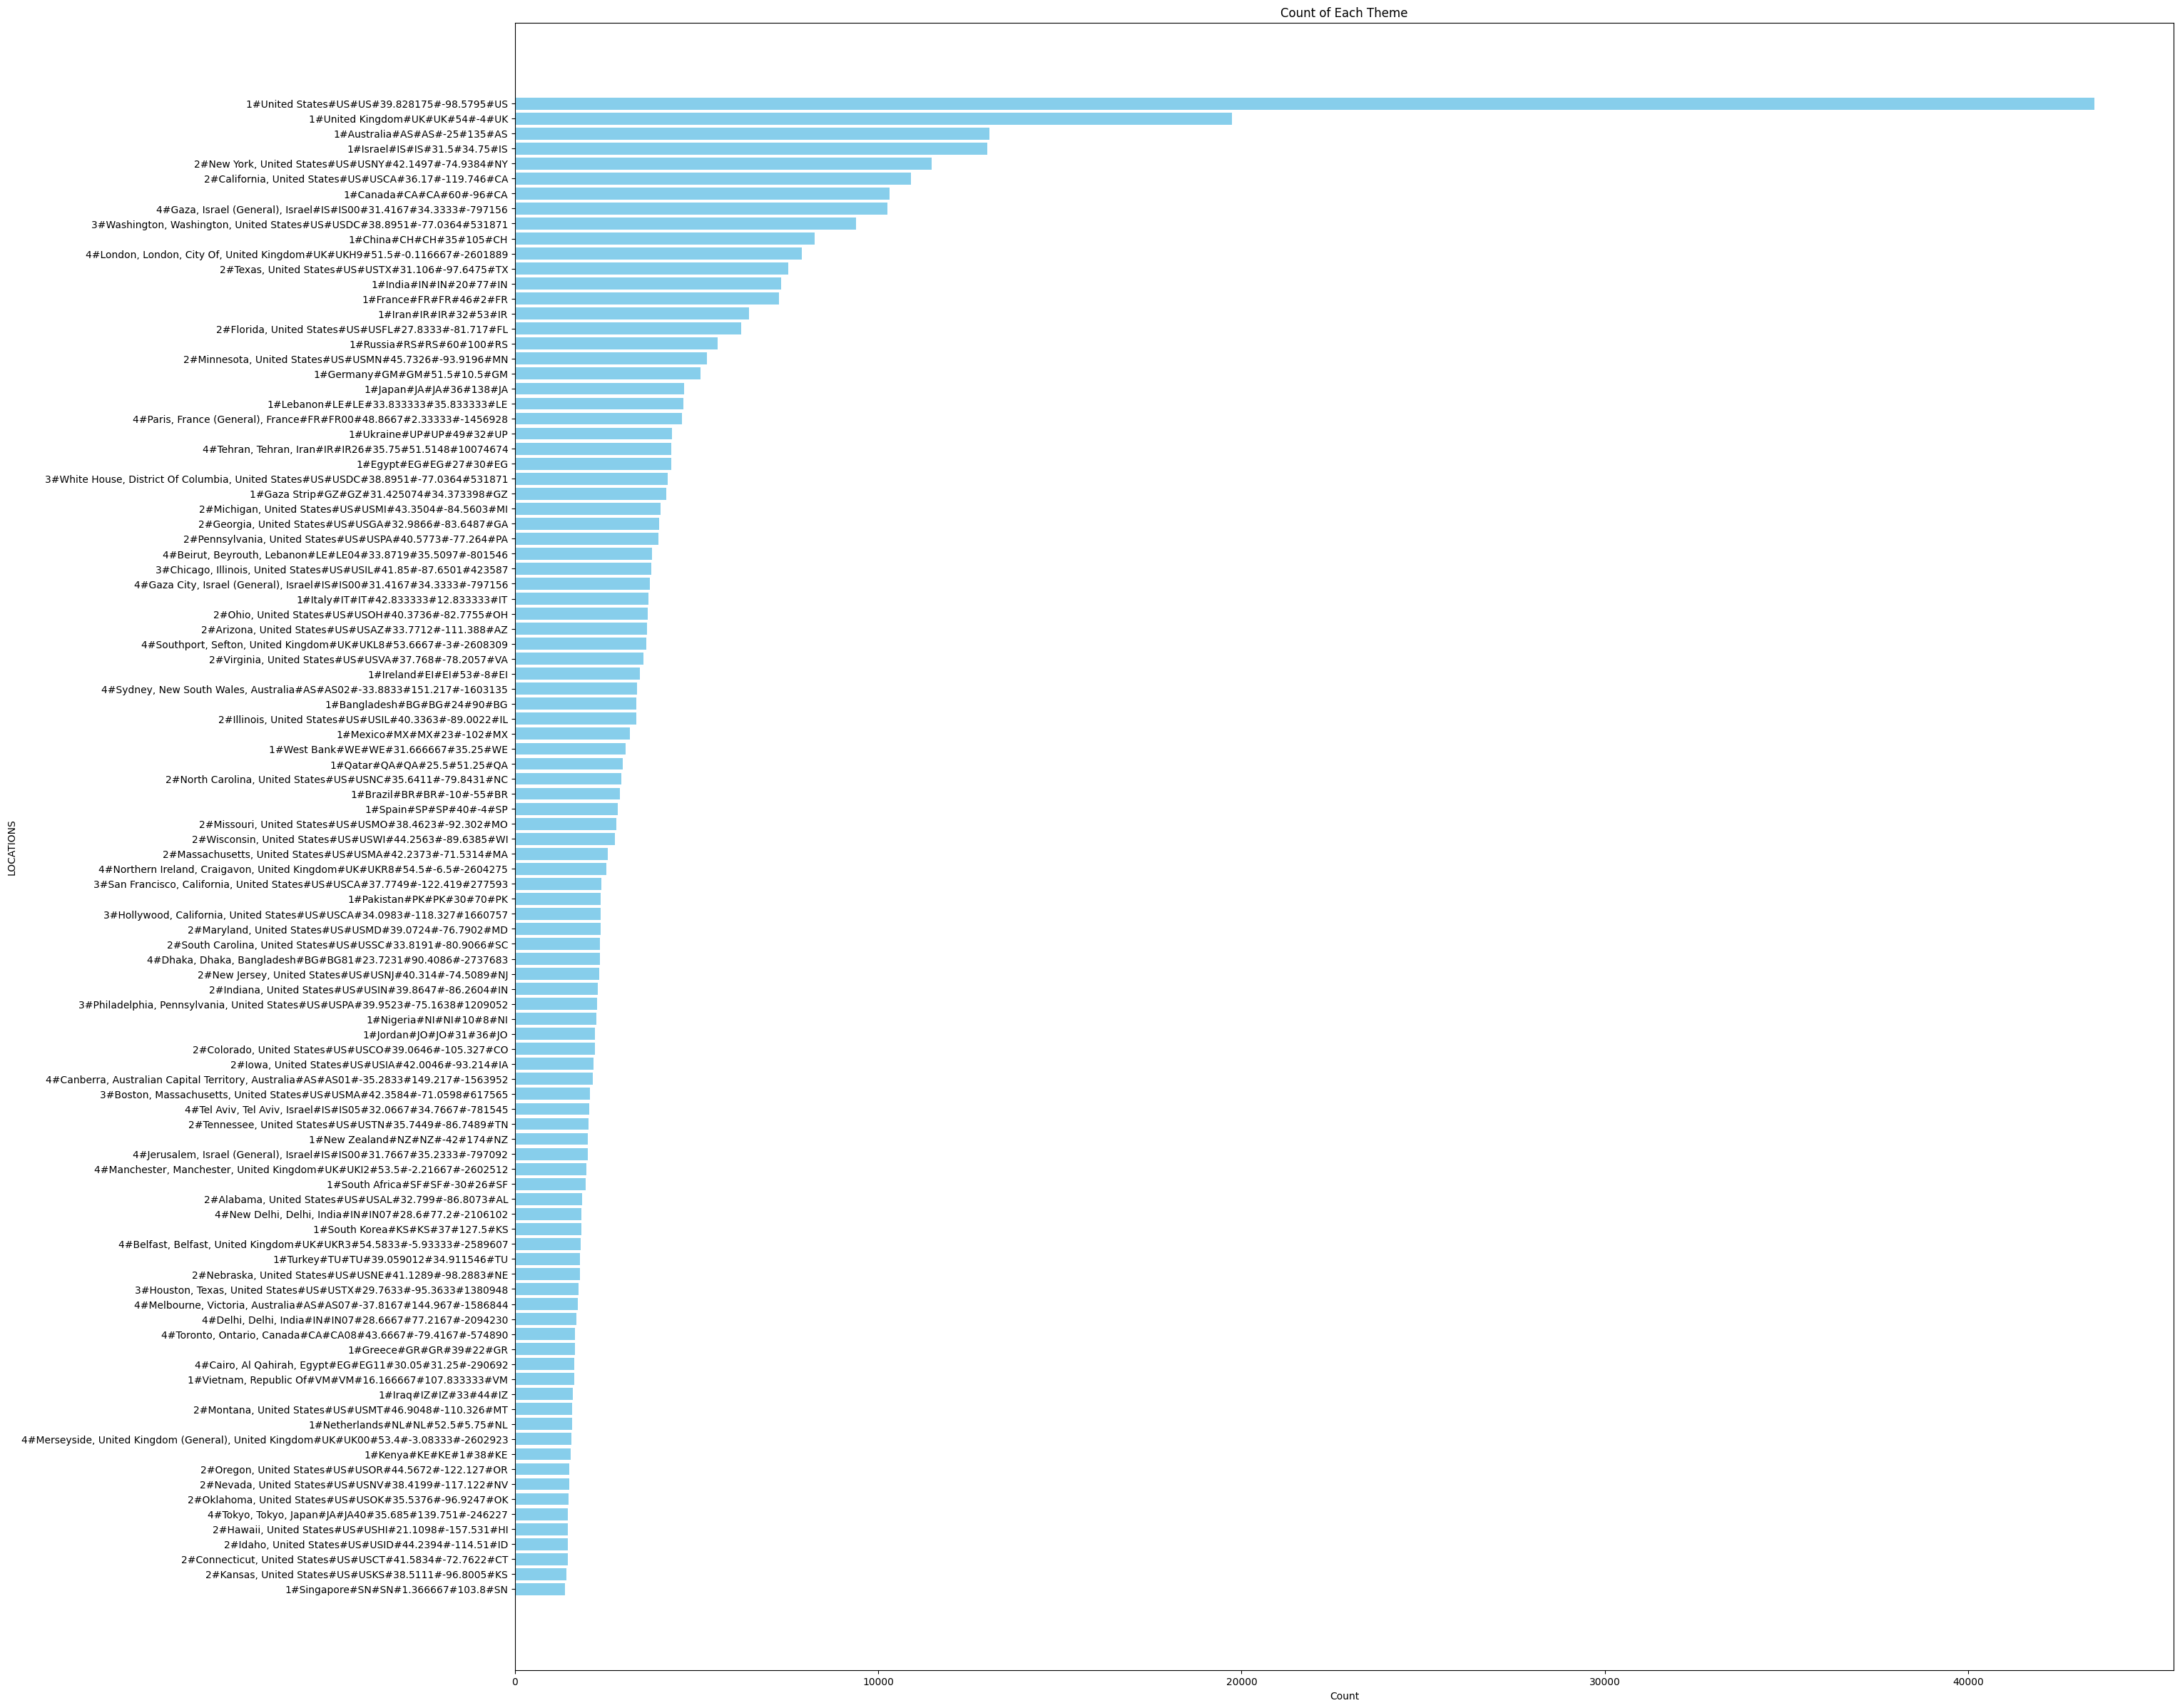

In [13]:
key = "LOCATIONS"
themes_split = df[key].str.split(";")
themes_split = themes_split.explode()
themes_split = themes_split.value_counts()
themes_split = themes_split.sort("count", descending=True)
themes = themes_split[key].to_numpy()[:100]
counts = themes_split['count'].to_numpy()[:100]
themes = np.where(themes == None, "No asignado", themes)
plt.figure(figsize=(30, 30))
plt.barh(themes, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel(key)
plt.title('Count of Each Theme')
plt.gca().invert_yaxis()
plt.show()


In [9]:
# archivo generado con comando
# python main.py collect_tone data/all_gdelt_gkg_files.csv data/parquets/tones
file_path  = Path('../data/parquets/tones/get_tones_and_urls-240820_1226.parquet')
df = pl.read_parquet(file_path)
df

SOURCEURLS,general_tone,positive_score,negative_score,polarity
str,str,str,str,str
"""https://localnews8.com/news/20…","""-8.82562277580071""","""1.56583629893238""","""10.3914590747331""","""11.9572953736655"""
"""https://www.thisiswiltshire.co…","""-8.83333333333333""","""0.666666666666667""","""9.5""","""10.1666666666667"""
"""https://www.dailypolitical.com…","""1.14942528735632""","""1.14942528735632""","""0""","""1.14942528735632"""
"""https://mix1065.iheart.com/fea…","""1.91082802547771""","""2.54777070063694""","""0.636942675159236""","""3.18471337579618"""
"""https://www.theguardian.com/au…","""-7.34177215189874""","""0.759493670886076""","""8.10126582278481""","""8.86075949367089"""
…,…,…,…,…
"""https://www.wvua23.com/tuesday…","""-9.09090909090909""","""0""","""9.09090909090909""","""9.09090909090909"""
"""https://www.teamtalk.com/totte…","""1.72413793103448""","""3.44827586206897""","""1.72413793103448""","""5.17241379310345"""
"""https://www.business-standard.…","""0.0995024875621895""","""3.08457711442786""","""2.98507462686567""","""6.06965174129353"""
